In [122]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams, figure
rcParams['figure.figsize'] = 15, 9
# figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
import statsmodels.api as sm  # import model API for statsmodels
from statsmodels.tsa.stattools import adfuller

# Time Series on Weekly Basis using ready ARIMA method

In [82]:
file1 = 'US Coffee C Futures Historical Data.csv'
table1 = pd.read_csv(file1)
table1

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2000",86.45,86.80,87.50,86.00,2.63K,0.17%
1,"Aug 01, 2000",86.30,86.50,87.75,86.10,2.74K,-0.17%
2,"Jul 31, 2000",86.45,85.75,87.00,84.10,3.99K,-1.09%
3,"Jul 28, 2000",87.40,86.75,88.10,86.75,2.48K,1.51%
4,"Jul 27, 2000",86.10,86.60,88.75,86.00,3.89K,-0.98%
5,"Jul 26, 2000",86.95,85.00,87.50,85.00,3.20K,2.05%
6,"Jul 25, 2000",85.20,85.50,87.25,85.00,4.75K,-1.27%
7,"Jul 24, 2000",86.30,87.00,89.00,84.40,10.79K,-10.71%
8,"Jul 21, 2000",96.65,99.50,103.25,96.25,7.27K,-1.13%
9,"Jul 20, 2000",97.75,100.00,104.00,95.35,10.47K,-12.06%


In [83]:
file2 = 'US Coffee C Futures Historical Data2.csv'
table2 = pd.read_csv(file2)
table2

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 26, 2019",101.78,101.18,102.90,100.63,-,0.82%
1,"Sep 25, 2019",100.95,98.90,101.55,97.25,24.94K,1.82%
2,"Sep 24, 2019",99.15,98.85,100.35,98.45,13.62K,0.15%
3,"Sep 23, 2019",99.00,98.50,100.90,98.15,17.16K,0.61%
4,"Sep 20, 2019",98.40,98.50,99.75,98.05,22.02K,0.05%
5,"Sep 19, 2019",98.35,100.35,100.75,98.10,17.60K,-2.31%
6,"Sep 18, 2019",100.68,100.83,101.83,100.13,-,0.08%
7,"Sep 17, 2019",100.60,103.60,104.05,99.98,-,-3.11%
8,"Sep 16, 2019",103.83,102.00,104.90,101.68,-,1.32%
9,"Sep 13, 2019",102.48,103.23,103.60,102.08,-,-0.97%


In [84]:
file3 = 'US Coffee C Futures Historical Data3.csv'
table3 = pd.read_csv(file3)
table3

,Date,Price,Open,High,Low,Vol.,Change %
0,"Sep 27, 2000",78.95,81.25,81.85,78.20,7.09K,-3.43%
1,"Sep 26, 2000",81.75,79.50,82.20,79.50,6.52K,3.42%
2,"Sep 25, 2000",79.05,78.25,79.10,78.20,1.92K,1.35%
3,"Sep 22, 2000",78.00,78.25,78.95,77.40,3.61K,0.26%
4,"Sep 21, 2000",77.80,78.30,79.15,77.60,4.58K,-1.71%
5,"Sep 20, 2000",79.15,80.25,81.25,78.00,7.98K,2.53%
6,"Sep 19, 2000",77.20,76.50,77.00,77.00,-,-0.26%
7,"Sep 18, 2000",77.40,75.00,77.50,77.00,0.01K,1.51%
8,"Sep 15, 2000",76.25,76.25,77.75,76.00,0.05K,-1.23%
9,"Sep 14, 2000",77.20,79.00,78.00,76.50,0.01K,-2.95%


In [85]:
data_frames = [table1, table2, table3]
df_init = pd.concat(data_frames)
df_init = df_init.drop_duplicates()

df_init.tail()

,Date,Price,Open,High,Low,Vol.,Change %
34,"Aug 09, 2000",79.50,82.90,83.50,79.3,8.56K,-5.02%
35,"Aug 08, 2000",83.70,85.50,86.00,83.4,4.50K,-1.99%
36,"Aug 07, 2000",85.40,85.50,86.00,84.8,2.53K,-0.23%
37,"Aug 04, 2000",85.60,85.85,86.25,85.0,2.52K,-0.29%
38,"Aug 03, 2000",85.85,86.50,87.50,85.0,2.66K,-0.69%


In [86]:
df_init['Date'] = df_init['Date'].astype(str)
df_init['Date'] = pd.to_datetime(df_init['Date'])
df_init = df_init.set_index(['Date'])
df_init

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-08-02,86.45,86.80,87.50,86.00,2.63K,0.17%
2000-08-01,86.30,86.50,87.75,86.10,2.74K,-0.17%
2000-07-31,86.45,85.75,87.00,84.10,3.99K,-1.09%
2000-07-28,87.40,86.75,88.10,86.75,2.48K,1.51%
2000-07-27,86.10,86.60,88.75,86.00,3.89K,-0.98%
2000-07-26,86.95,85.00,87.50,85.00,3.20K,2.05%
2000-07-25,85.20,85.50,87.25,85.00,4.75K,-1.27%
2000-07-24,86.30,87.00,89.00,84.40,10.79K,-10.71%
2000-07-21,96.65,99.50,103.25,96.25,7.27K,-1.13%


In [87]:
df = df_init.loc[:'2015-09-15', :]

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2000-08-09,79.50,82.90,83.50,79.3,8.56K,-5.02%
2000-08-08,83.70,85.50,86.00,83.4,4.50K,-1.99%
2000-08-07,85.40,85.50,86.00,84.8,2.53K,-0.23%
2000-08-04,85.60,85.85,86.25,85.0,2.52K,-0.29%
2000-08-03,85.85,86.50,87.50,85.0,2.66K,-0.69%


In [126]:
df.sort_index(inplace=True)
df.tail()

,Price
Date,
2015-08-18,135.30
2015-08-25,117.05
2015-09-01,117.05
2015-09-08,117.70
2015-09-15,115.50


In [89]:
df = df.asfreq('D')
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1980-08-26,130.75,130.62,132.00,124.50,0.29K,2.28%
1980-08-27,131.08,131.50,132.00,127.50,0.33K,0.25%
1980-08-28,130.22,128.12,130.50,127.25,0.16K,-0.66%
1980-08-29,128.00,126.25,128.90,125.50,0.08K,-1.70%
1980-08-30,NaN,NaN,NaN,NaN,NaN,NaN
1980-08-31,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-02,125.57,124.62,125.75,123.10,0.14K,-1.90%
1980-09-03,127.25,124.37,127.49,124.00,0.37K,1.34%


In [90]:
df = df.resample('D').interpolate()[::7]
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1980-08-26,130.750,130.62,132.00,124.50,0.29K,2.28%
1980-09-02,125.570,124.62,125.75,123.10,0.14K,-1.90%
1980-09-09,136.350,130.75,136.75,130.75,0.12K,1.46%
1980-09-16,128.870,122.49,130.00,121.50,0.18K,5.42%
1980-09-23,131.360,132.87,134.75,131.25,1.18K,-2.83%
1980-09-30,126.660,129.25,131.65,126.10,1.12K,-1.62%
1980-10-07,128.380,128.38,128.60,124.05,1.39K,3.22%
1980-10-14,132.110,132.37,132.75,131.00,0.57K,-0.12%
1980-10-21,126.990,128.75,129.00,126.75,0.63K,-2.17%


In [125]:
# Select only price

df = df.loc[:, ['Price']]
df.tail()

,Price
Date,
2015-08-18,135.30
2015-08-25,117.05
2015-09-01,117.05
2015-09-08,117.70
2015-09-15,115.50


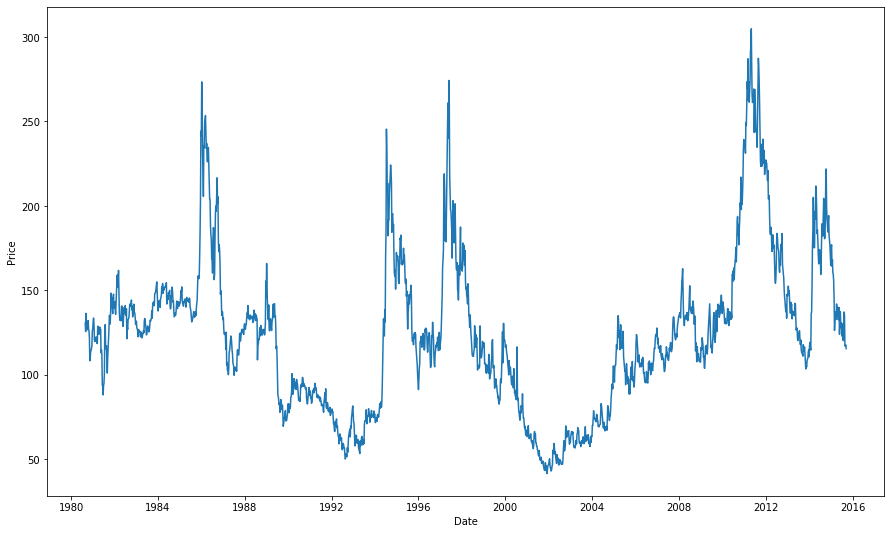

In [92]:
# Plot graph first

# plot graph

plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df)

In [93]:
# Determining roling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean, rolstd)

                 Price
Date                  
1980-08-26         NaN
1980-09-02         NaN
1980-09-09         NaN
1980-09-16         NaN
1980-09-23         NaN
1980-09-30         NaN
1980-10-07         NaN
1980-10-14         NaN
1980-10-21         NaN
1980-10-28         NaN
1980-11-04         NaN
1980-11-11  126.964583
1980-11-18  125.235417
1980-11-25  124.265417
1980-12-02  122.434583
1980-12-09  121.341250
1980-12-16  120.144583
1980-12-23  120.094583
1980-12-30  119.979583
1981-01-06  119.929583
1981-01-13  120.479583
1981-01-20  120.837917
1981-01-27  120.709167
1981-02-03  121.658333
1981-02-10  122.575000
1981-02-17  123.095833
1981-02-24  123.766667
1981-03-03  124.266667
1981-03-10  124.402500
1981-03-17  123.772500
...                ...
2015-02-24  166.454167
2015-03-03  162.020833
2015-03-10  158.270833
2015-03-17  155.183333
2015-03-24  152.891667
2015-03-31  149.391667
2015-04-07  146.475000
2015-04-14  144.000000
2015-04-21  141.675000
2015-04-28  139.791667
2015-05-05 

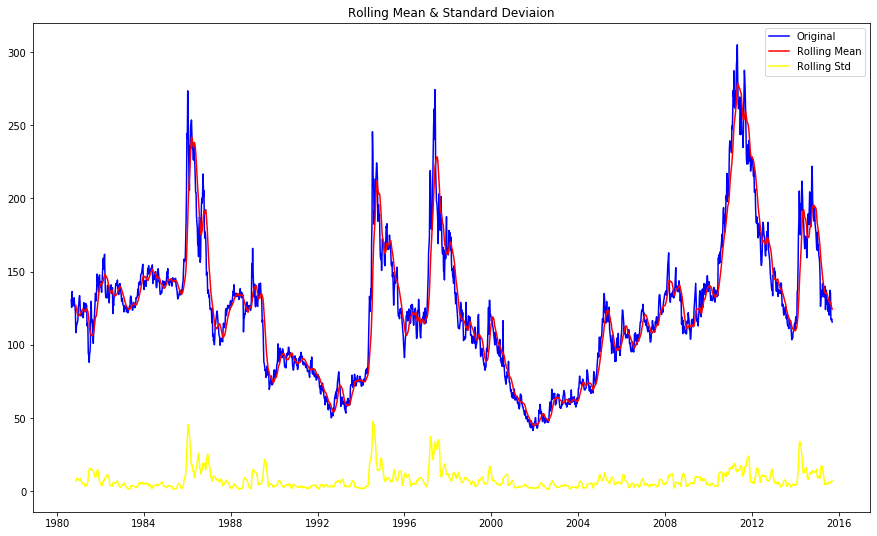

In [94]:
# Plot rolling statistics

orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='yellow', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviaion')
plt.show(block=False)

In [95]:
# Perform Dickey-Fuller test:

print("Result of Dickey-Fuller Test:")
dftest = adfuller(df['Price'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4],
                     index=[
                         'Test Statistics', 'p-value', '#Lags Used',
                         'Number of Observations Used'
                     ])
for key, value in dftest[4].items():
    dfoutput['Critial Value (%s)' % key] = value

print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistics                  -3.462607
p-value                           0.009001
#Lags Used                       10.000000
Number of Observations Used    1819.000000
Critial Value (1%)               -3.433950
Critial Value (5%)               -2.863130
Critial Value (10%)              -2.567617
dtype: float64


In [96]:
rolmean.dropna(inplace=True)
rolstd.dropna(inplace=True)

In [97]:
def test_stationary(timeseries):

    # Determining rolling stats
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()

    # Plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingStd, color='yellow', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviaion')
    plt.show(block=False)

    # Perform Dickey-Fuller test:

    print("Result of Dickey-Fuller Test:")
    dftest = adfuller(timeseries['Price'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4],
                         index=[
                             'Test Statistics', 'p-value', '#Lags Used',
                             'Number of Observations Used'
                         ])
    for key, value in dftest[4].items():
        dfoutput['Critial Value (%s)' % key] = value

    print(dfoutput)

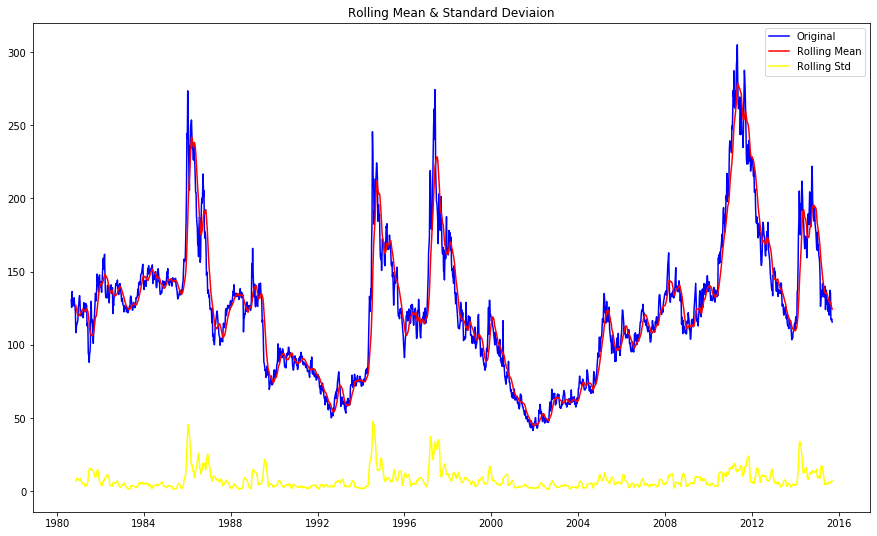

Result of Dickey-Fuller Test:
Test Statistics                  -3.462607
p-value                           0.009001
#Lags Used                       10.000000
Number of Observations Used    1819.000000
Critial Value (1%)               -3.433950
Critial Value (5%)               -2.863130
Critial Value (10%)              -2.567617
dtype: float64


In [98]:
test_stationary(df)

 ## Log Transform to Eliminate Trend
 
 After Log Transform , we do "smoothing"

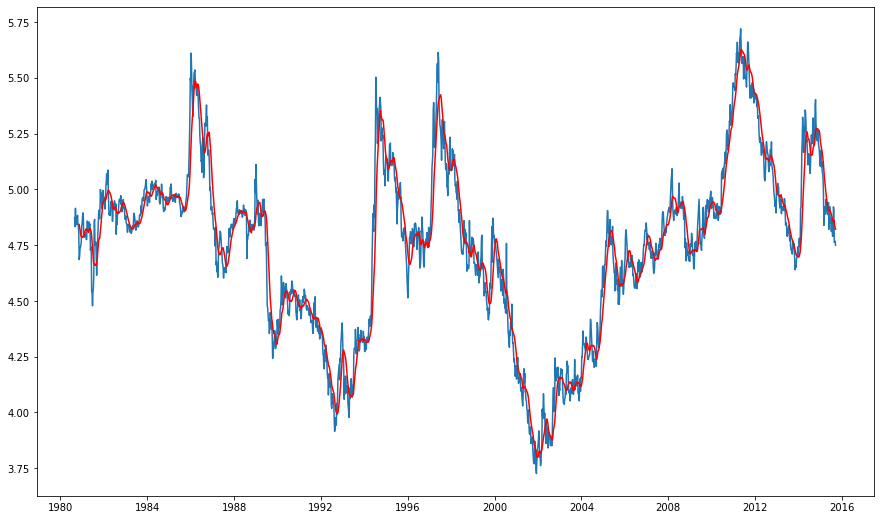

In [99]:
df_log = np.log(df)
moving_avg = df_log.rolling(window=12).mean()
plt.plot(df_log)
plt.plot(moving_avg, color='red')

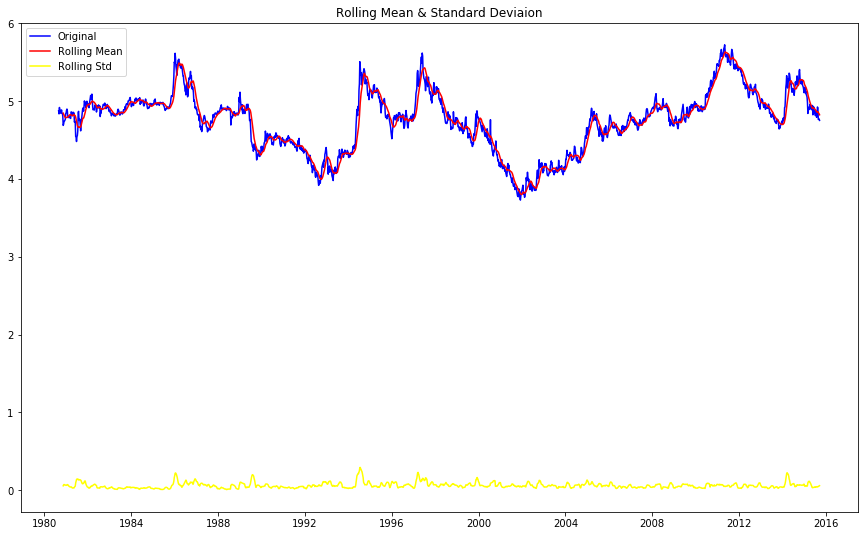

Result of Dickey-Fuller Test:
Test Statistics                  -2.926317
p-value                           0.042372
#Lags Used                       10.000000
Number of Observations Used    1819.000000
Critial Value (1%)               -3.433950
Critial Value (5%)               -2.863130
Critial Value (10%)              -2.567617
dtype: float64


In [107]:
test_stationary(df_log)

In [100]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.head(12)

,Price
Date,
1980-08-26,NaN
1980-09-02,NaN
1980-09-09,NaN
1980-09-16,NaN
1980-09-23,NaN
1980-09-30,NaN
1980-10-07,NaN
1980-10-14,NaN
1980-10-21,NaN


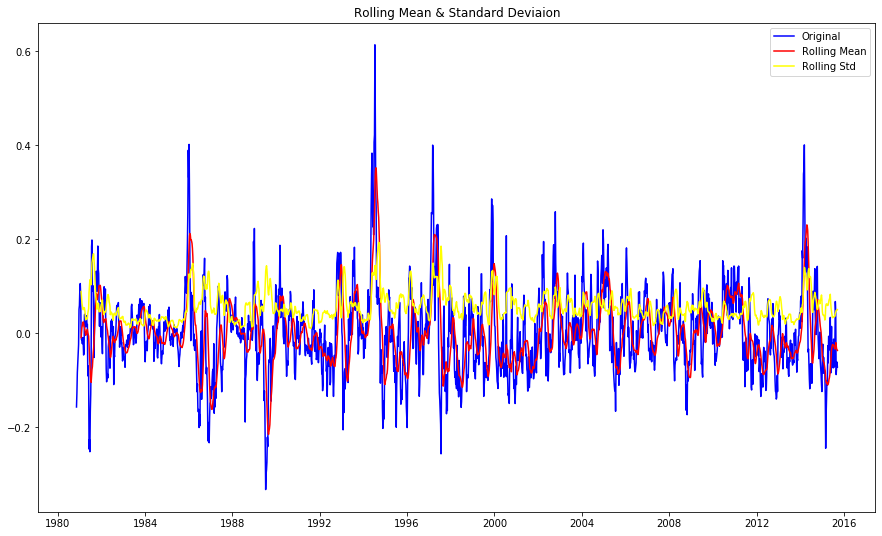

Result of Dickey-Fuller Test:
Test Statistics               -1.232281e+01
p-value                        6.691750e-23
#Lags Used                     3.000000e+00
Number of Observations Used    1.815000e+03
Critial Value (1%)            -3.433958e+00
Critial Value (5%)            -2.863134e+00
Critial Value (10%)           -2.567618e+00
dtype: float64


In [101]:
df_log_moving_avg_diff.dropna(inplace=True)
test_stationary(df_log_moving_avg_diff)

In [102]:
arima = sm.tsa.ARIMA(df_log_moving_avg_diff, order=(2, 1, 0))

In [103]:
model = arima.fit()

In [104]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 1818
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2953.617
Method:                       css-mle   S.D. of innovations              0.048
Date:                Tue, 01 Oct 2019   AIC                          -5899.233
Time:                        16:22:37   BIC                          -5877.211
Sample:                    11-18-1980   HQIC                         -5891.108
                         - 09-15-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.639e-05      0.001      0.044      0.965      -0.002       0.002
ar.L1.D.Price    -0.0546      0.023     -2.329      0.020      -0.101      -0.009
ar.L2.D.Price     0.0004      0.023     

In [131]:
df_init.sort_index(inplace=True)
df_init.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-09-20,98.40,98.50,99.75,98.05,22.02K,0.05%
2019-09-23,99.00,98.50,100.90,98.15,17.16K,0.61%
2019-09-24,99.15,98.85,100.35,98.45,13.62K,0.15%
2019-09-25,100.95,98.90,101.55,97.25,24.94K,1.82%
2019-09-26,101.78,101.18,102.90,100.63,-,0.82%


In [136]:
start_date = '2014-01-07'
end_date = '2019-09-24'
predictions = model.predict(start=start_date, end=end_date)
predictions

2014-01-07    0.001840
2014-01-14   -0.003073
2014-01-21   -0.000542
2014-01-28    0.001823
2014-02-04    0.001236
2014-02-11   -0.008235
2014-02-18    0.000985
2014-02-25   -0.004237
2014-03-04   -0.005433
2014-03-11   -0.000400
2014-03-18   -0.002832
2014-03-25    0.006279
2014-04-01    0.006761
2014-04-08    0.001840
2014-04-15   -0.003941
2014-04-22    0.003591
2014-04-29   -0.002503
2014-05-06    0.002766
2014-05-13    0.004234
2014-05-20    0.005391
2014-05-27   -0.000346
2014-06-03    0.001807
2014-06-10    0.001768
2014-06-17    0.001172
2014-06-24   -0.001235
2014-07-01   -0.001593
2014-07-08    0.001223
2014-07-15   -0.001125
2014-07-22    0.002345
2014-07-29   -0.003919
                ...   
2019-03-05    0.000046
2019-03-12    0.000046
2019-03-19    0.000046
2019-03-26    0.000046
2019-04-02    0.000046
2019-04-09    0.000046
2019-04-16    0.000046
2019-04-23    0.000046
2019-04-30    0.000046
2019-05-07    0.000046
2019-05-14    0.000046
2019-05-21    0.000046
2019-05-28 

In [137]:
frame = {'Date': predictions.index, 'Price': predictions.values}
predictions_df = pd.DataFrame(frame)
predictions_df = predictions_df.set_index(['Date'])
predictions_df = predictions_df + moving_avg.loc[start_date:end_date, :]
predictions_df = np.exp(predictions_df)
predictions_df

,Price
Date,
2014-01-07,109.828845
2014-01-14,109.863584
2014-01-21,110.906042
2014-01-28,112.125021
2014-02-04,114.446309
2014-02-11,115.951582
2014-02-18,120.435221
2014-02-25,124.615481
2014-03-04,130.020582


The predictions are looking good. However the results below are after inverting the "smoothing" we had done before. We used past observations data to get the rolling mean for this. Now we must find a way to invert smoothing after the end date of observations, using the rolling mean of predictions.

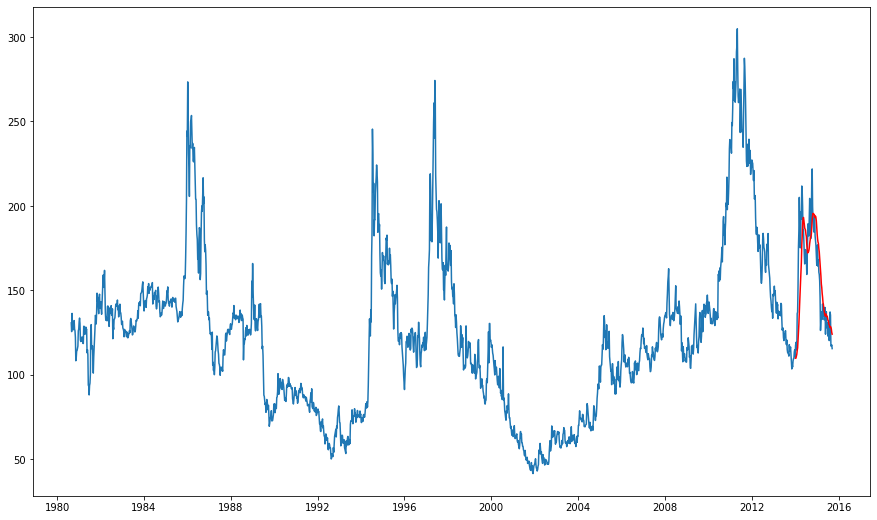

In [138]:
plt.plot(df)
plt.plot(predictions_df, color='red')